In [62]:
!pip install pandas
!pip install nump
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [66]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [67]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [68]:
df.shape

(150, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
#checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [72]:
#checking duplicates
df.drop_duplicates(subset='species')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [73]:
#checking if all the species have equal amount of rows
df.value_counts('species')

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Visualising Target Column

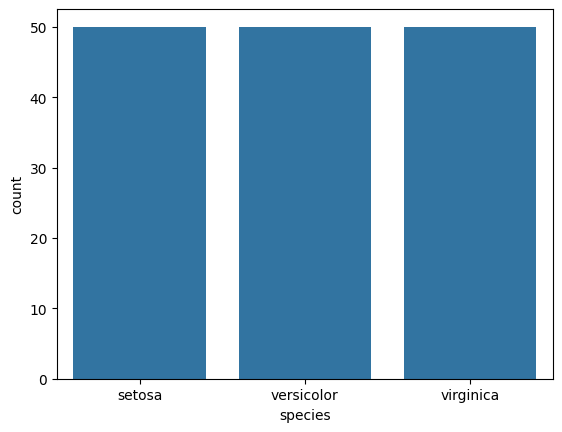

In [75]:
sns.countplot(x='species', data=df)
plt.show()

## Relation between Variables

### Comparing Sepal Length and Sepal Width

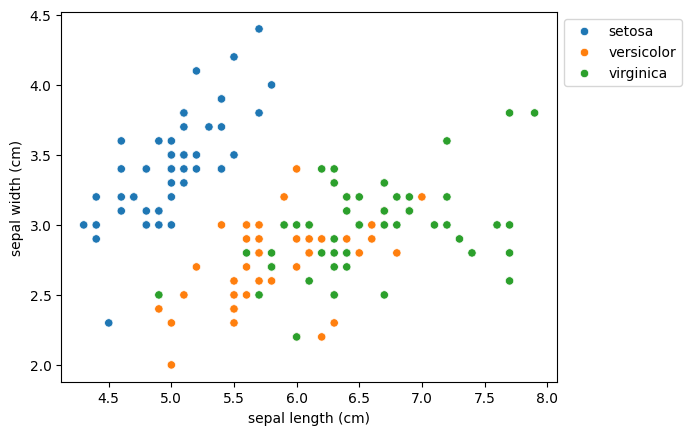

In [76]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df, hue='species')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [1]:
# From the above plot, we can infer that – 

# Species Setosa has smaller sepal lengths but larger sepal widths.
# Versicolor Species lies in the middle of the other two species in terms of sepal length and width
# Species Virginica has larger sepal lengths but smaller sepal widths.

### Comparing Petal Length and Petal Width

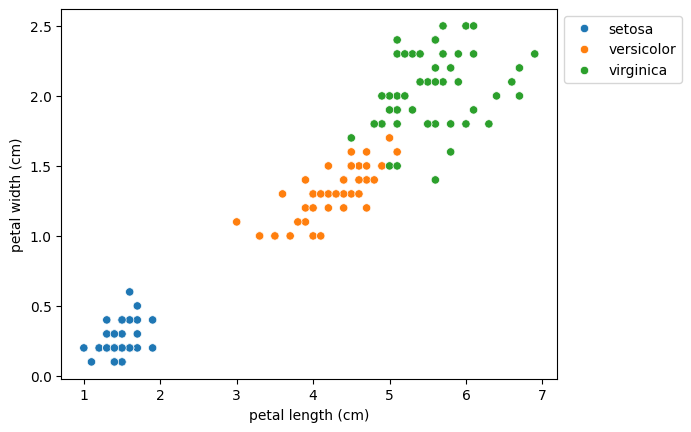

In [78]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=df, hue='species')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [3]:
# From the above plot, we can infer that – 

# Species Setosa has smaller petal lengths and widths.
# Versicolor Species lies in the middle of the other two species in terms of petal length and width
# Species Virginica has the largest of petal lengths and widths.

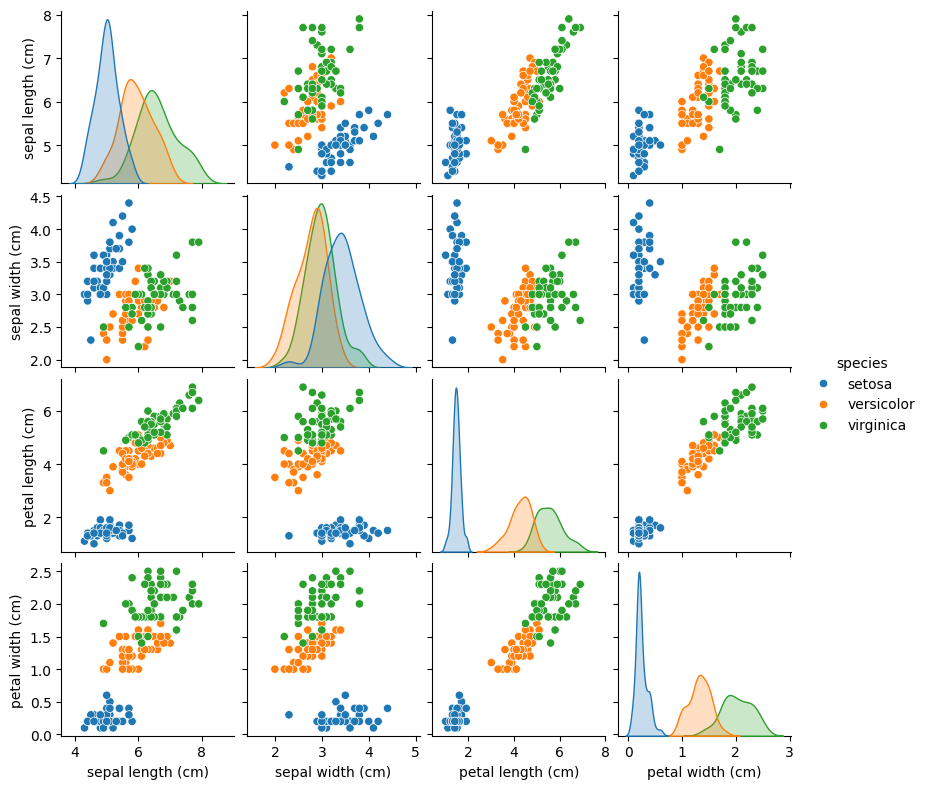

In [80]:
sns.pairplot(df, hue='species', height=2)

# Histrograms

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

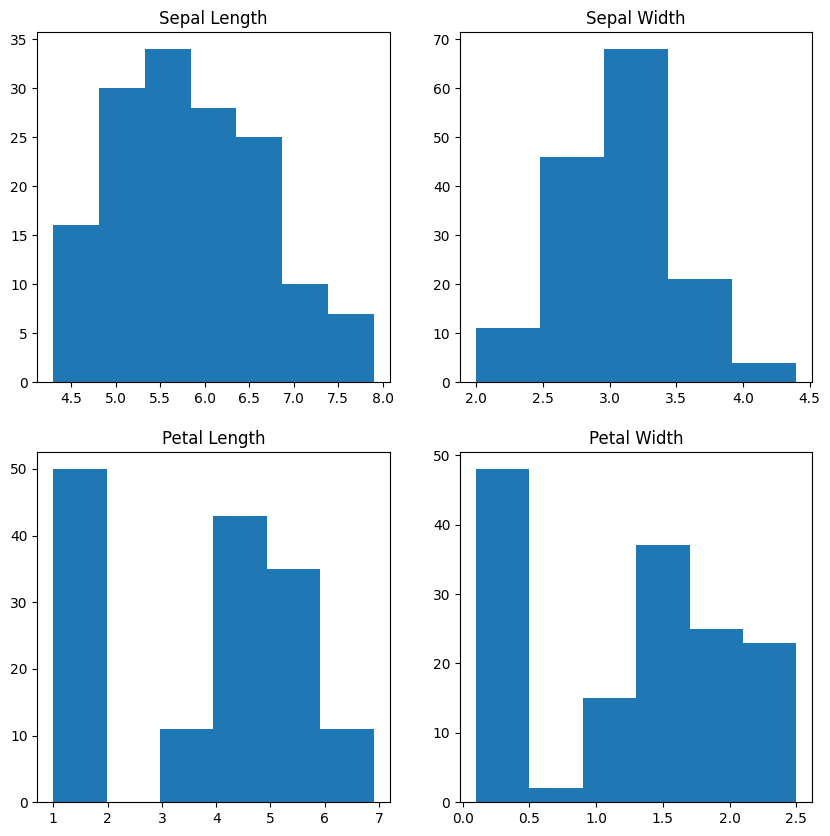

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].set_title('Sepal Length')
axes[0, 0].hist(df['sepal length (cm)'], bins=7)

axes[0, 1].set_title('Sepal Width')
axes[0, 1].hist(df['sepal width (cm)'], bins=5)

axes[1, 0].set_title('Petal Length')
axes[1, 0].hist(df['petal length (cm)'], bins=6)

axes[1, 1].set_title('Petal Width')
axes[1, 1].hist(df['petal width (cm)'], bins=6)

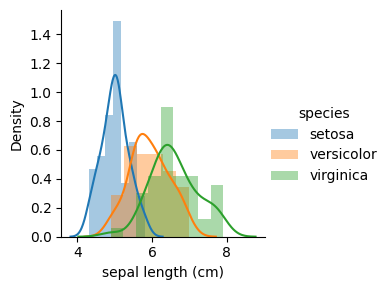

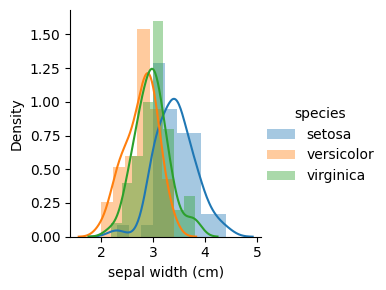

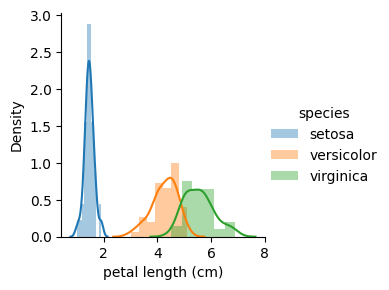

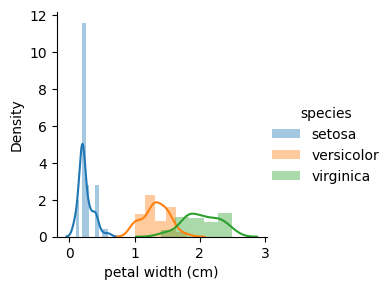

In [82]:
plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, 'sepal length (cm)').add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, 'sepal width (cm)').add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, 'petal length (cm)').add_legend()

plot = sns.FacetGrid(df, hue='species')
plot.map(sns.distplot, 'petal width (cm)').add_legend()

plt.show()

## Heat Maps

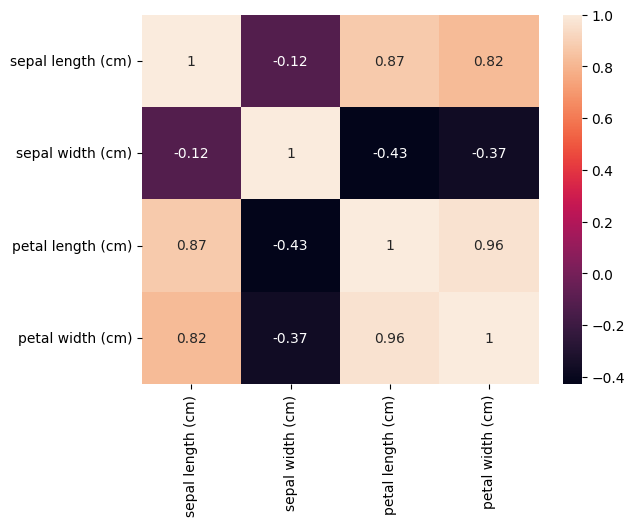

In [83]:
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson'), annot=True)
plt.show()

# Boxplot

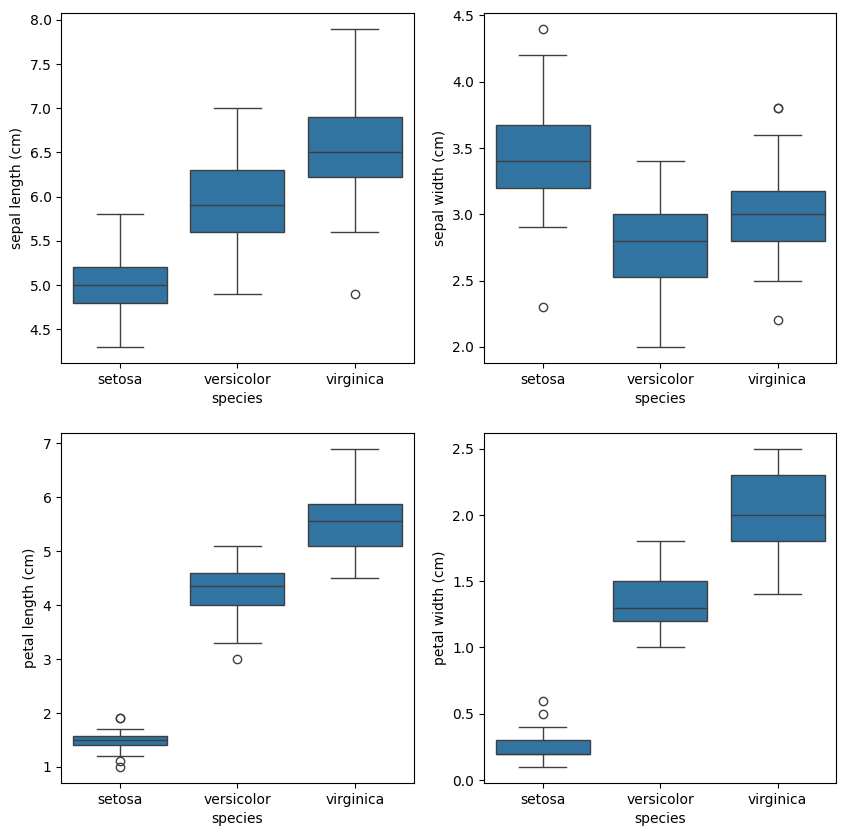

In [84]:
def graph(y):
    sns.boxplot(x='species', y=y, data=df)

plt.figure(figsize=(10,10))

plt.subplot(221)
graph('sepal length (cm)')

plt.subplot(222)
graph('sepal width (cm)')

plt.subplot(223)
graph('petal length (cm)')

plt.subplot(224)
graph('petal width (cm)')

plt.show()

## Handling outliers

Old Shape:  (150, 5)
New Shape:  (150, 5)


<Axes: xlabel='sepal width (cm)'>

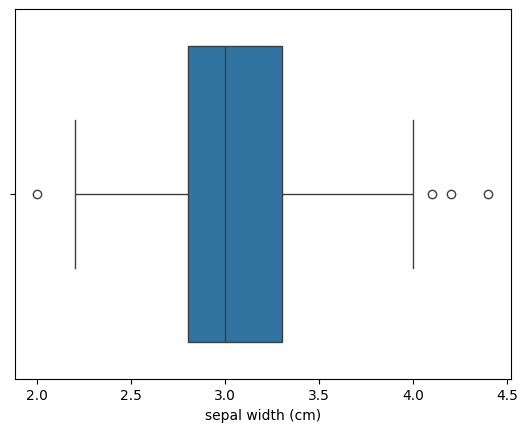

In [85]:
Q1 = np.percentile(df['sepal width (cm)'], 25, interpolation='midpoint')
Q3 = np.percentile(df['sepal width (cm)'], 75, interpolation='midpoint')
IQR = Q3 = Q1
print('Old Shape: ', df.shape)

#Upper bound
upper = np.where(df['sepal width (cm)'] >= (Q3+1.5*IQR))

#Lower bound
lower = np.where(df['sepal width (cm)'] <= (Q3-1.5*IQR))

#Removing the Outliers
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

print("New Shape: ", df.shape)

sns.boxplot(x='sepal width (cm)', data=df)